In [8]:
# Imports
import numpy as np
import pandas as pd
import pydot
from IPython.display import display, SVG, clear_output, HTML

In [2]:
dv = pd.read_csv('./input/dv_space.csv')
qoi = pd.read_csv('./input/qoi_space.csv')

In [3]:
graph = pydot.Dot("ADG", graph_type="digraph", bgcolor="transparent", rankdir='BT')

In [4]:
# Add nodes
dv_nodes = []
for var in dv.Variables:
    dvnode = pydot.Node(var)
    graph.add_node(dvnode)
    dv_nodes.append(dvnode)
    
qoi_nodes = []
for var in qoi.Variables:
    qoinode = pydot.Node(var)
    graph.add_node(qoinode)
    qoi_nodes.append(qoinode)
    
# for i in range(len(qoi_nodes)):
#     for j in range(len(dv_nodes)):
#         graph.add_edge(pydot.Edge(qoi_nodes[i], dv_nodes[j]))

In [5]:
# Adding clusters
clusters = []
for cluster in set(list(dv.Cluster)):
    # Set cluster properties
    temp_cluster = pydot.Cluster(cluster, style='filled', color='lightgrey', label=cluster)
    # Find corresponding dv_nodes
    cluster_indices = list(dv[dv['Cluster']==cluster].index)
    # Add dv nodes to the cluster
    for index in cluster_indices:
        temp_cluster.add_node(dv_nodes[index])
    # Add cluster to the graph    
    graph.add_subgraph(temp_cluster)
    clusters.append(temp_cluster)

In [10]:
output_graphviz_svg = graph.create_svg()
graph.write_png("output.png")

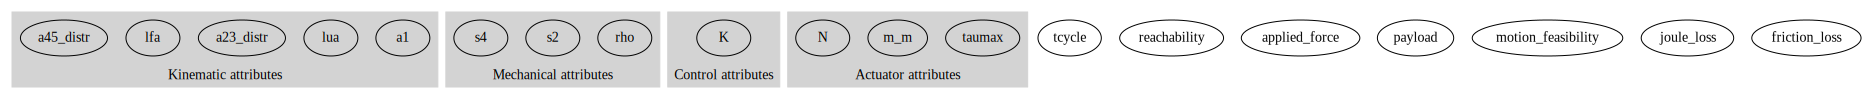

In [11]:
SVG(output_graphviz_svg)

In [21]:
# pydot.Dot.set_node_defaults(graph, color='lightgray',
#                             style='filled',
#                             shape='box',
#                             fontname='Courier',
#                             fontsize='10')